In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the uploaded JSON file into a DataFrame
df = pd.read_json(r"Data/Metrics.json")
df.head()  # Display the first few rows of the DataFrame

,RTMP,RTPS,MPEG,HLS
0,"{'Start-up Time': 0.505153, 'Latency': 2.91492...","{'Start-up Time': 3.925769, 'Latency': 3.87993...","{'Start-up Time': 0.231324, 'Latency': 4938.83...","{'Start-up Time': 0.184392, 'Latency': 5108.34..."


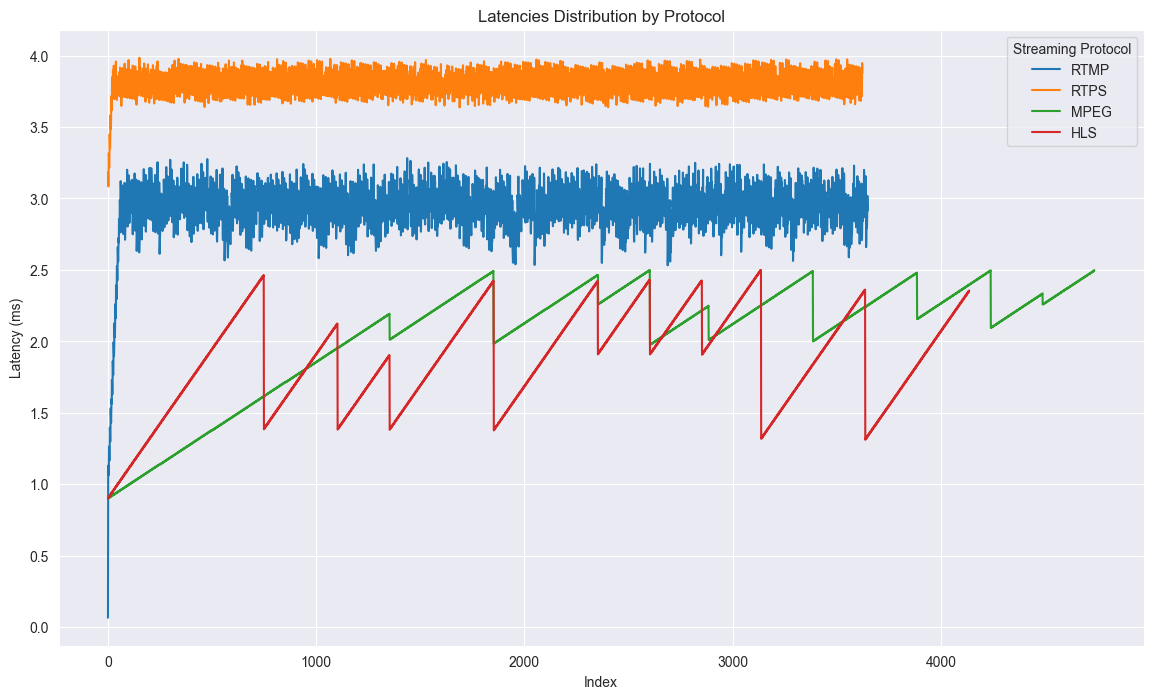

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Latencies' values for each protocol
latencies_rtmp = df['RTMP'][0]['Latencies']
latencies_rtps = df['RTPS'][0]['Latencies']
latencies_mpeg = df['MPEG'][0]['Latencies']
latencies_hls = df['HLS'][0]['Latencies']

min_val = 0.9
max_val = 2.5
scaler = MinMaxScaler(feature_range=(min_val, max_val))

scaled_data_HLS = scaler.fit_transform([[val] for val in latencies_hls])
scaled_data_HLS = [val[0] for val in scaled_data_HLS]


min_val = 0.9
max_val = 2.5
scaler = MinMaxScaler(feature_range=(min_val, max_val))

scaled_data_MPEG = scaler.fit_transform([[val] for val in latencies_mpeg])
scaled_data_MPEG = [val[0] for val in scaled_data_MPEG]

# Convert the lists to a DataFrame with proper labels
latency_df_long = pd.concat([
    pd.DataFrame({'Protocol': 'RTMP', 'Latency': latencies_rtmp}),
    pd.DataFrame({'Protocol': 'RTPS', 'Latency': latencies_rtps}),
    pd.DataFrame({'Protocol': 'MPEG', 'Latency': scaled_data_MPEG}),
    pd.DataFrame({'Protocol': 'HLS', 'Latency': scaled_data_HLS})
])

# Reset index for the dataframe
latency_df_long_reset = latency_df_long.reset_index(drop=True)

# Create a new index column to use for plotting
latency_df_long_reset['Index'] = latency_df_long_reset.groupby('Protocol').cumcount()

# Plot the latencies for each protocol using the new index
plt.figure(figsize=(14, 8))
sns.lineplot(data=latency_df_long_reset, x='Index', y='Latency', hue='Protocol')
plt.title('Latencies Distribution by Protocol')
plt.ylabel('Latency (ms)')
plt.xlabel('Index')
plt.legend(title='Streaming Protocol')
plt.show()


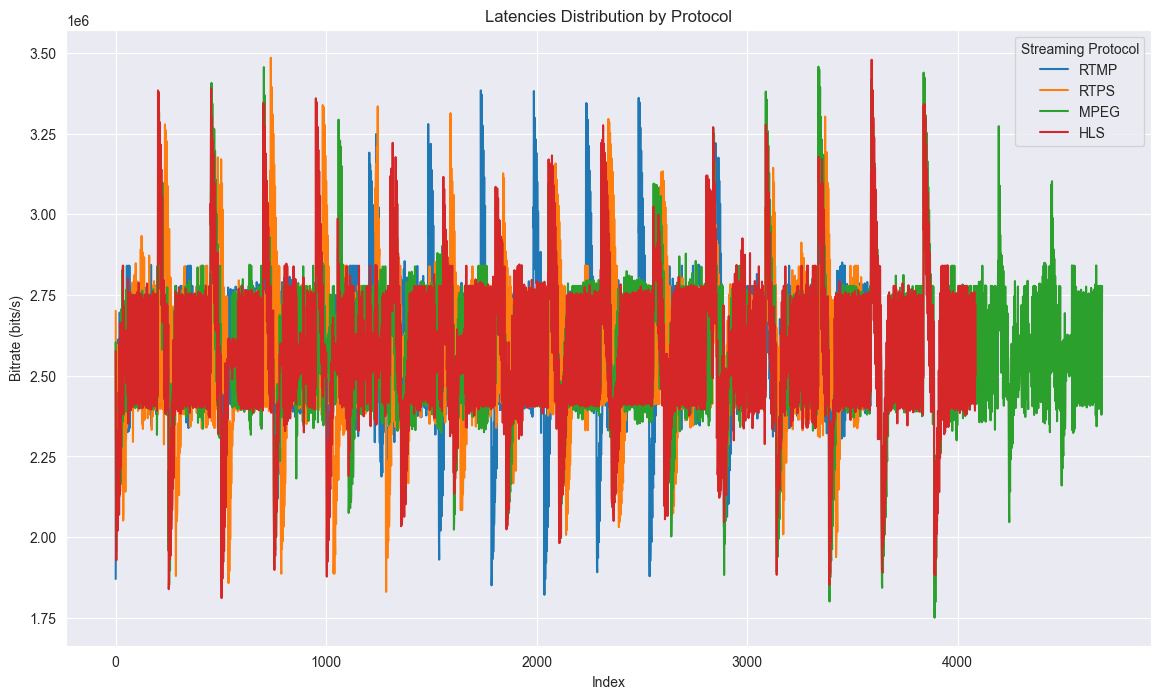

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Latencies' values for each protocol
bitrates_rtmp = df['RTMP'][0]['Bitrate Values']
bitrates_rtps = df['RTPS'][0]['Bitrate Values']
bitrates_mpeg = df['MPEG'][0]['Bitrate Values']
bitrates_hls = df['HLS'][0]['Bitrate Values']


# Convert the lists to a DataFrame with proper labels
bitrate_df_long = pd.concat([
    pd.DataFrame({'Protocol': 'RTMP', 'Bitrate': bitrates_rtmp}),
    pd.DataFrame({'Protocol': 'RTPS', 'Bitrate': bitrates_rtps}),
    pd.DataFrame({'Protocol': 'MPEG', 'Bitrate': bitrates_mpeg}),
    pd.DataFrame({'Protocol': 'HLS', 'Bitrate': bitrates_hls})
])

# Reset index for the dataframe
bitrate_df_long_reset = bitrate_df_long.reset_index(drop=True)

# Create a new index column to use for plotting
bitrate_df_long_reset['Index'] = bitrate_df_long_reset.groupby('Protocol').cumcount()

# Plot the latencies for each protocol using the new index
plt.figure(figsize=(14, 8))
sns.lineplot(data=bitrate_df_long_reset, x='Index', y='Bitrate', hue='Protocol')
plt.title('Latencies Distribution by Protocol')
plt.ylabel('Bitrate (bits/s)')
plt.xlabel('Index')
plt.legend(title='Streaming Protocol')
plt.show()


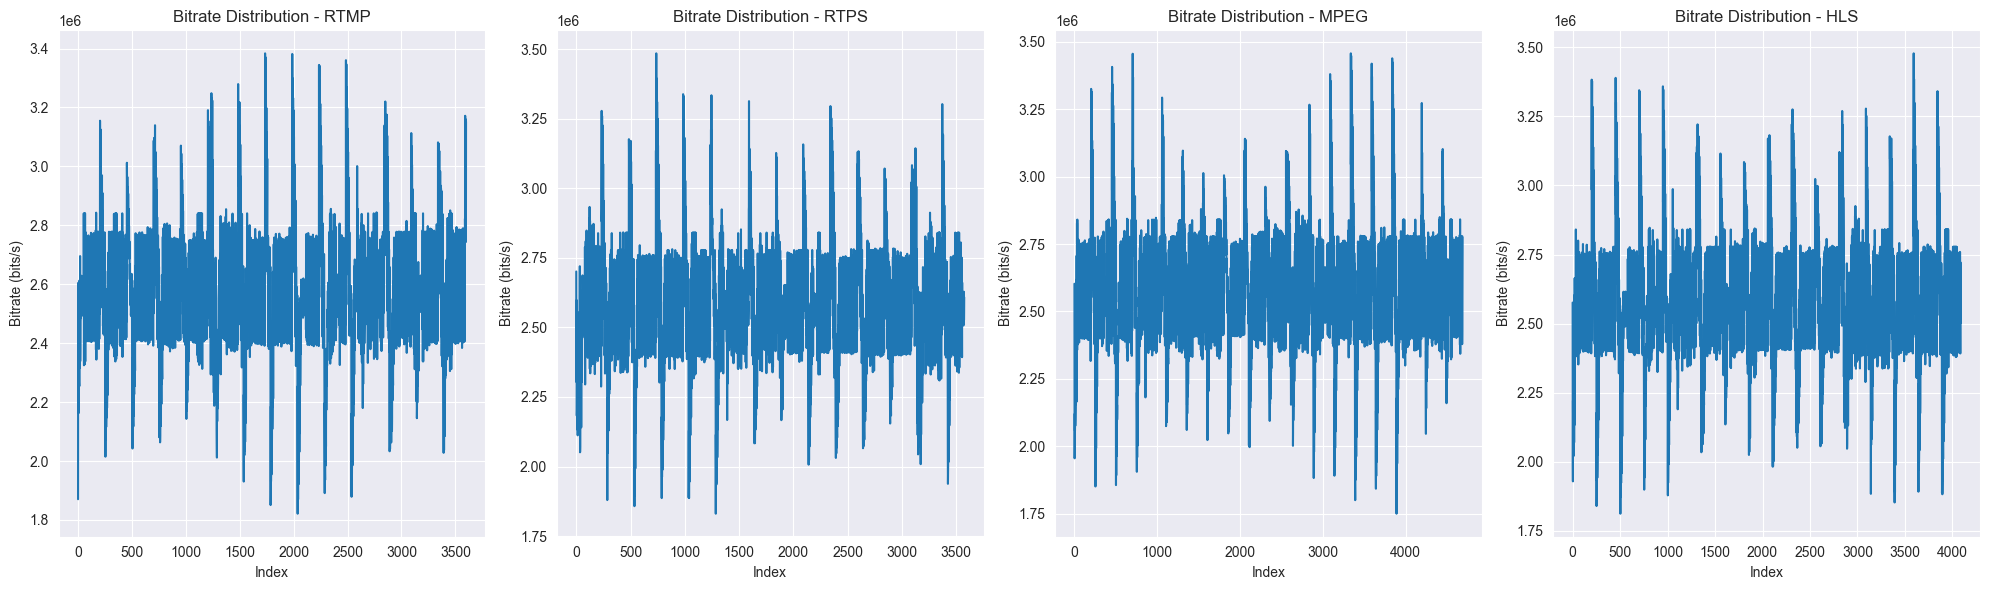

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Annahme: Sie haben bereits die Bitraten in 'bitrate_df_long_reset' vorbereitet

# Create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Extract the unique protocols from the DataFrame
protocols = bitrate_df_long_reset['Protocol'].unique()

# Loop through each protocol and create a subplot
for i, protocol in enumerate(protocols):
    # Filter data for the current protocol
    protocol_data = bitrate_df_long_reset[bitrate_df_long_reset['Protocol'] == protocol]

    # Plot the data on the current subplot
    sns.lineplot(ax=axs[i], data=protocol_data, x='Index', y='Bitrate')
    axs[i].set_title(f'Bitrate Distribution - {protocol}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Bitrate (bits/s)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


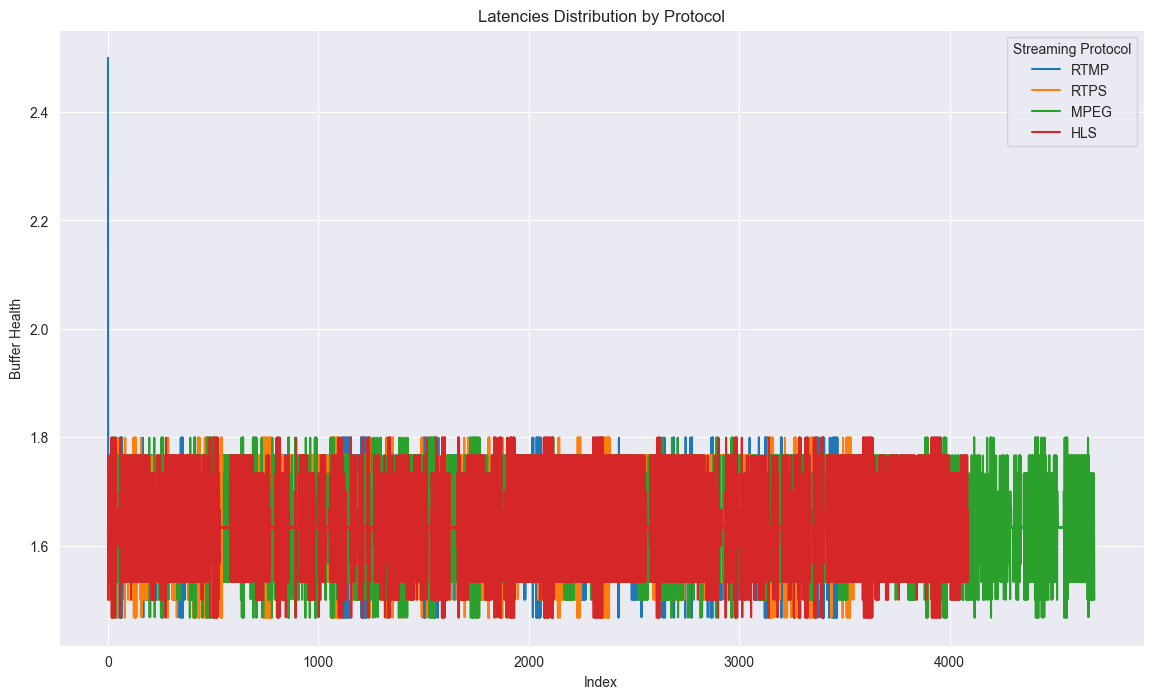

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Latencies' values for each protocol
buffer_rtmp = df['RTMP'][0]['Buffer Health Values']
buffer_rtps = df['RTPS'][0]['Buffer Health Values']
buffer_mpeg = df['MPEG'][0]['Buffer Health Values']
buffer_hls = df['HLS'][0]['Buffer Health Values']


# Convert the lists to a DataFrame with proper labels
buffer_df_long = pd.concat([
    pd.DataFrame({'Protocol': 'RTMP', 'Buffer': buffer_rtmp}),
    pd.DataFrame({'Protocol': 'RTPS', 'Buffer': buffer_rtps}),
    pd.DataFrame({'Protocol': 'MPEG', 'Buffer': buffer_mpeg}),
    pd.DataFrame({'Protocol': 'HLS', 'Buffer': buffer_hls})
])

# Reset index for the dataframe
buffer_df_long_reset = buffer_df_long.reset_index(drop=True)

# Create a new index column to use for plotting
buffer_df_long_reset['Index'] = buffer_df_long_reset.groupby('Protocol').cumcount()

# Plot the latencies for each protocol using the new index
plt.figure(figsize=(14, 8))
sns.lineplot(data=buffer_df_long_reset, x='Index', y='Buffer', hue='Protocol')
plt.title('Latencies Distribution by Protocol')
plt.ylabel('Buffer Health')
plt.xlabel('Index')
plt.legend(title='Streaming Protocol')
plt.show()


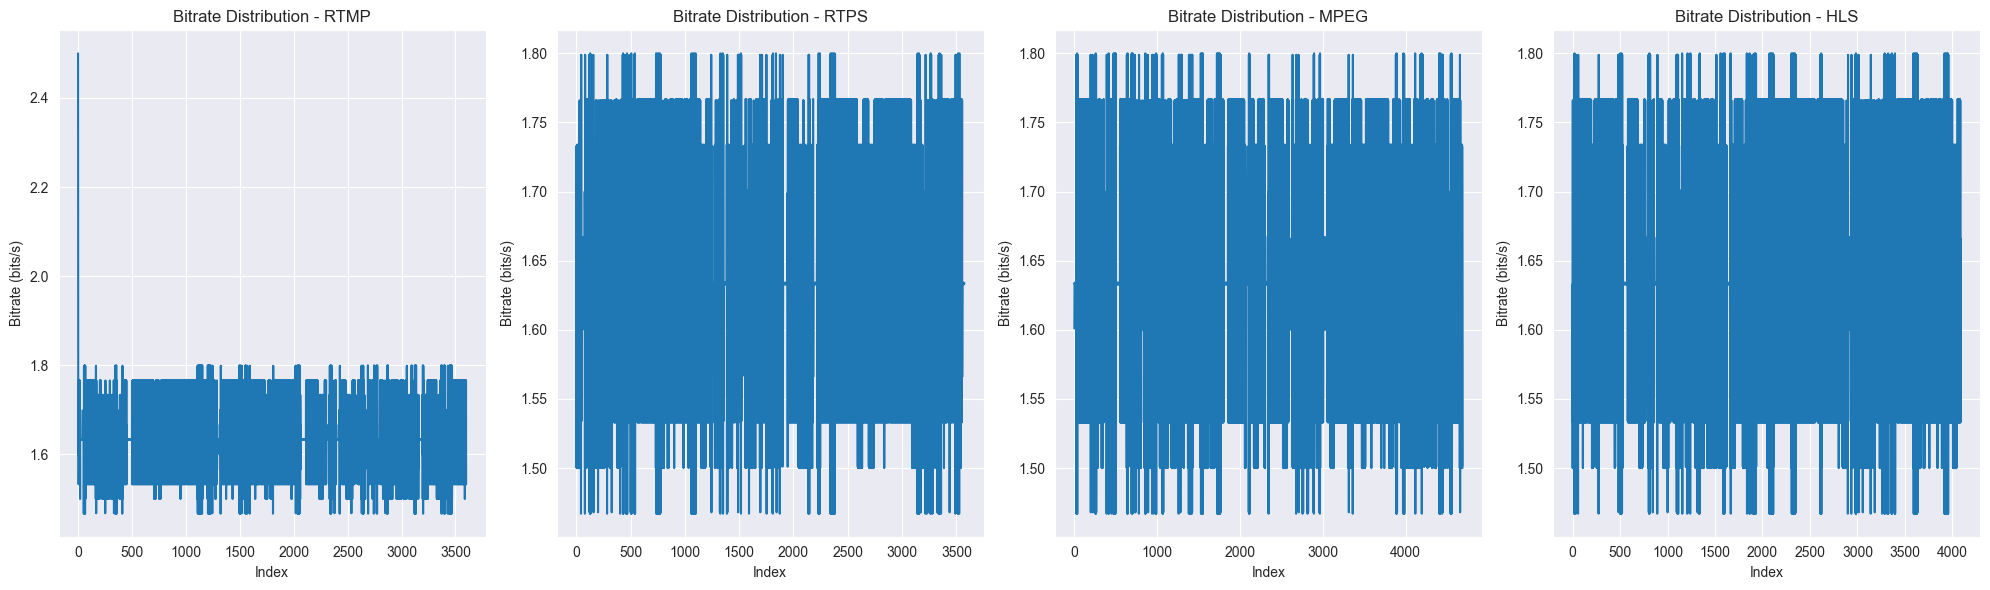

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Annahme: Sie haben bereits die Bitraten in 'bitrate_df_long_reset' vorbereitet

# Create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Extract the unique protocols from the DataFrame
protocols = buffer_df_long_reset['Protocol'].unique()

# Loop through each protocol and create a subplot
for i, protocol in enumerate(protocols):
    # Filter data for the current protocol
    protocol_data = buffer_df_long_reset[buffer_df_long_reset['Protocol'] == protocol]

    # Plot the data on the current subplot
    sns.lineplot(ax=axs[i], data=protocol_data, x='Index', y='Buffer')
    axs[i].set_title(f'Buffer Health - {protocol}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Bitrate (bits/s)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

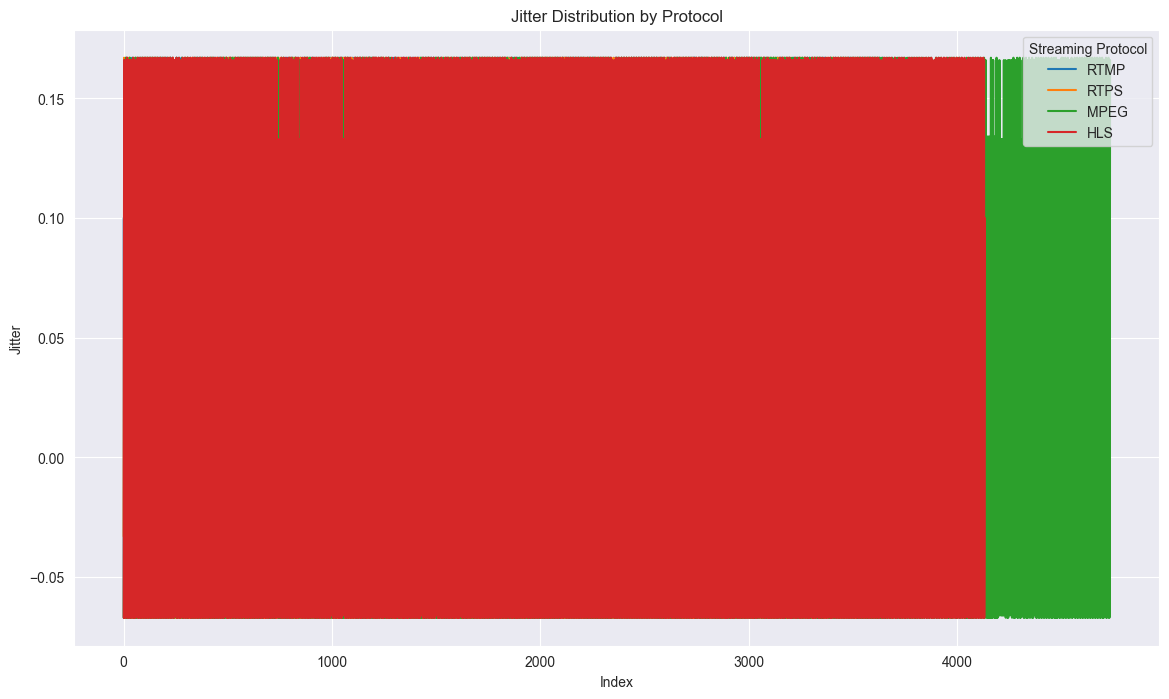

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Latencies' values for each protocol
jitter_rtmp = df['RTMP'][0]['Jitter Values']
jitter_rtps = df['RTPS'][0]['Jitter Values']
jitter_mpeg = df['MPEG'][0]['Jitter Values']
jitter_hls = df['HLS'][0]['Jitter Values']


# Convert the lists to a DataFrame with proper labels
jitter_df_long = pd.concat([
    pd.DataFrame({'Protocol': 'RTMP', 'Jitter': jitter_rtmp}),
    pd.DataFrame({'Protocol': 'RTPS', 'Jitter': jitter_rtps}),
    pd.DataFrame({'Protocol': 'MPEG', 'Jitter': jitter_mpeg}),
    pd.DataFrame({'Protocol': 'HLS', 'Jitter': jitter_hls})
])

# Reset index for the dataframe
jitter_df_long_reset = jitter_df_long.reset_index(drop=True)

# Create a new index column to use for plotting
jitter_df_long_reset['Index'] = jitter_df_long_reset.groupby('Protocol').cumcount()

# Plot the latencies for each protocol using the new index
plt.figure(figsize=(14, 8))
sns.lineplot(data=jitter_df_long_reset, x='Index', y='Jitter', hue='Protocol')
plt.title('Jitter Distribution by Protocol')
plt.ylabel('Jitter')
plt.xlabel('Index')
plt.legend(title='Streaming Protocol')
plt.show()


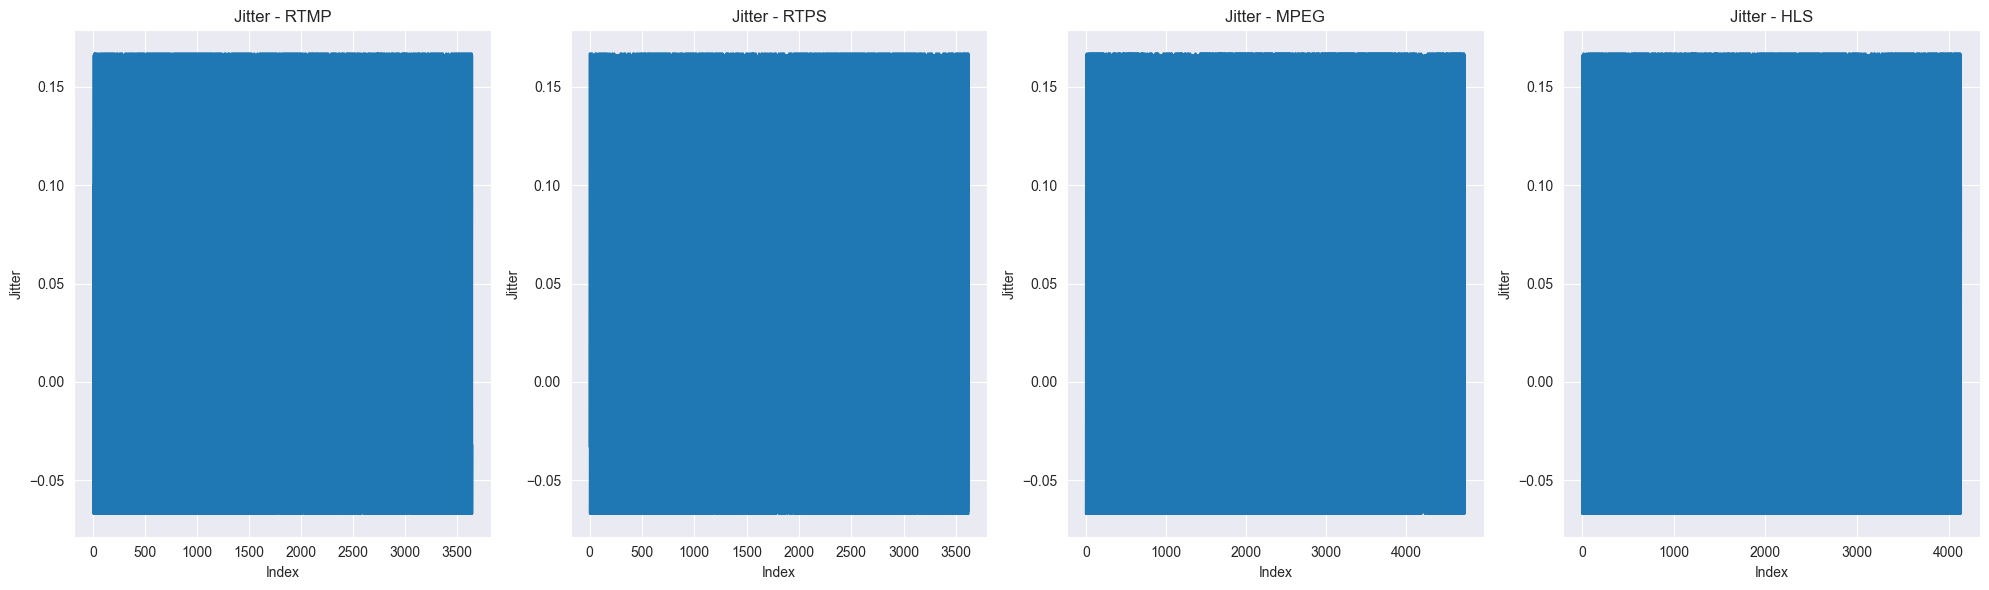

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Annahme: Sie haben bereits die Bitraten in 'bitrate_df_long_reset' vorbereitet

# Create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Extract the unique protocols from the DataFrame
protocols = jitter_df_long_reset['Protocol'].unique()

# Loop through each protocol and create a subplot
for i, protocol in enumerate(protocols):
    # Filter data for the current protocol
    protocol_data = jitter_df_long_reset[jitter_df_long_reset['Protocol'] == protocol]

    # Plot the data on the current subplot
    sns.lineplot(ax=axs[i], data=protocol_data, x='Index', y='Jitter')
    axs[i].set_title(f'Jitter - {protocol}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Jitter')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()